In [287]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
random.seed(42)

In [288]:
df = pd.read_csv(r"C:\Users\gabri\Documents\Project3.csv")

In [289]:
df.head()

,time_opened,time_closed,total_questions,total_pages_visited,left_contact_info
0,2023-11-28 10:00,2023-11-28 10:07,5,3,0
1,2023-11-28 11:30,2023-11-28 11:32,3,2,0
2,2023-11-28 12:45,2023-11-28 12:47,7,4,0
3,2023-11-28 14:00,2023-11-28 14:02,4,2,0
4,2023-11-28 15:15,2023-11-28 15:22,8,3,1


In [290]:
df.describe(include="all")

,time_opened,time_closed,total_questions,total_pages_visited,left_contact_info
count,1051,1051,1051.000000,1051.000000,1051.000000
unique,1050,1051,NaN,NaN,NaN
top,2023-12-02 10:00,2023-11-28 10:07,NaN,NaN,NaN
freq,2,1,NaN,NaN,NaN
mean,NaN,NaN,5.047574,3.300666,0.346337
std,NaN,NaN,1.766250,1.408474,0.476029
min,NaN,NaN,2.000000,1.000000,0.000000
25%,NaN,NaN,3.000000,2.000000,0.000000
50%,NaN,NaN,5.000000,3.000000,0.000000
75%,NaN,NaN,6.000000,4.000000,1.000000


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   time_opened          1051 non-null   object
 1   time_closed          1051 non-null   object
 2   total_questions      1051 non-null   int64 
 3   total_pages_visited  1051 non-null   int64 
 4   left_contact_info    1051 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 41.2+ KB


In [292]:
# Transform datetime to a datetime data format
df['time_opened'] = pd.to_datetime(df['time_opened'])
df['time_closed'] = pd.to_datetime(df['time_closed'])

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time_opened          1051 non-null   datetime64[ns]
 1   time_closed          1051 non-null   datetime64[ns]
 2   total_questions      1051 non-null   int64         
 3   total_pages_visited  1051 non-null   int64         
 4   left_contact_info    1051 non-null   int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 41.2 KB


In [294]:
df.head()

,time_opened,time_closed,total_questions,total_pages_visited,left_contact_info
0,2023-11-28 10:00:00,2023-11-28 10:07:00,5,3,0
1,2023-11-28 11:30:00,2023-11-28 11:32:00,3,2,0
2,2023-11-28 12:45:00,2023-11-28 12:47:00,7,4,0
3,2023-11-28 14:00:00,2023-11-28 14:02:00,4,2,0
4,2023-11-28 15:15:00,2023-11-28 15:22:00,8,3,1


In [295]:
df['duration'] = df['time_closed'] - df['time_opened']

In [296]:
df.describe(include='all')

,time_opened,time_closed,total_questions,total_pages_visited,left_contact_info,duration
count,1051,1051,1051.000000,1051.000000,1051.000000,1051
mean,2024-01-02 01:39:21.750713600,2024-01-02 01:43:58.915318784,5.047574,3.300666,0.346337,0 days 00:04:37.164605137
min,2023-11-28 10:00:00,2023-11-28 10:07:00,2.000000,1.000000,0.000000,0 days 00:01:00
25%,2023-12-14 06:22:30,2023-12-14 06:30:00,3.000000,2.000000,0.000000,0 days 00:03:00
50%,2023-12-28 00:45:00,2023-12-28 00:48:00,5.000000,3.000000,0.000000,0 days 00:03:00
75%,2024-01-24 06:52:30,2024-01-24 06:57:30,6.000000,4.000000,1.000000,0 days 00:05:00
max,2024-02-09 11:00:00,2024-02-09 11:04:00,10.000000,8.000000,1.000000,0 days 00:13:00
std,NaN,NaN,1.766250,1.408474,0.476029,0 days 00:03:13.066360472


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   time_opened          1051 non-null   datetime64[ns] 
 1   time_closed          1051 non-null   datetime64[ns] 
 2   total_questions      1051 non-null   int64          
 3   total_pages_visited  1051 non-null   int64          
 4   left_contact_info    1051 non-null   int64          
 5   duration             1051 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), timedelta64[ns](1)
memory usage: 49.4 KB


In [298]:
df['duration_complete_seconds'] = df['duration'].dt.total_seconds()
df['duration_minutes'] = df['duration_complete_seconds'] / 60

In [299]:
df.head()

,time_opened,time_closed,total_questions,total_pages_visited,left_contact_info,duration,duration_complete_seconds,duration_minutes
0,2023-11-28 10:00:00,2023-11-28 10:07:00,5,3,0,0 days 00:07:00,420.0,7.0
1,2023-11-28 11:30:00,2023-11-28 11:32:00,3,2,0,0 days 00:02:00,120.0,2.0
2,2023-11-28 12:45:00,2023-11-28 12:47:00,7,4,0,0 days 00:02:00,120.0,2.0
3,2023-11-28 14:00:00,2023-11-28 14:02:00,4,2,0,0 days 00:02:00,120.0,2.0
4,2023-11-28 15:15:00,2023-11-28 15:22:00,8,3,1,0 days 00:07:00,420.0,7.0


In [300]:
df.describe(include='all')

,time_opened,time_closed,total_questions,total_pages_visited,left_contact_info,duration,duration_complete_seconds,duration_minutes
count,1051,1051,1051.000000,1051.000000,1051.000000,1051,1051.000000,1051.000000
mean,2024-01-02 01:39:21.750713600,2024-01-02 01:43:58.915318784,5.047574,3.300666,0.346337,0 days 00:04:37.164605137,277.164605,4.619410
min,2023-11-28 10:00:00,2023-11-28 10:07:00,2.000000,1.000000,0.000000,0 days 00:01:00,60.000000,1.000000
25%,2023-12-14 06:22:30,2023-12-14 06:30:00,3.000000,2.000000,0.000000,0 days 00:03:00,180.000000,3.000000
50%,2023-12-28 00:45:00,2023-12-28 00:48:00,5.000000,3.000000,0.000000,0 days 00:03:00,180.000000,3.000000
75%,2024-01-24 06:52:30,2024-01-24 06:57:30,6.000000,4.000000,1.000000,0 days 00:05:00,300.000000,5.000000
max,2024-02-09 11:00:00,2024-02-09 11:04:00,10.000000,8.000000,1.000000,0 days 00:13:00,780.000000,13.000000
std,NaN,NaN,1.766250,1.408474,0.476029,0 days 00:03:13.066360472,193.066360,3.217773


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   time_opened                1051 non-null   datetime64[ns] 
 1   time_closed                1051 non-null   datetime64[ns] 
 2   total_questions            1051 non-null   int64          
 3   total_pages_visited        1051 non-null   int64          
 4   left_contact_info          1051 non-null   int64          
 5   duration                   1051 non-null   timedelta64[ns]
 6   duration_complete_seconds  1051 non-null   float64        
 7   duration_minutes           1051 non-null   float64        
dtypes: datetime64[ns](2), float64(2), int64(3), timedelta64[ns](1)
memory usage: 65.8 KB


In [302]:
#Adding additional columns
df['total_questions_per_minute'] = df['total_questions'] / (df['duration_minutes'])
df['total_pages_visited_per_minute'] = df['total_pages_visited'] / (df['duration_minutes'])

In [303]:
df.head()

,time_opened,time_closed,total_questions,total_pages_visited,left_contact_info,duration,duration_complete_seconds,duration_minutes,total_questions_per_minute,total_pages_visited_per_minute
0,2023-11-28 10:00:00,2023-11-28 10:07:00,5,3,0,0 days 00:07:00,420.0,7.0,0.714286,0.428571
1,2023-11-28 11:30:00,2023-11-28 11:32:00,3,2,0,0 days 00:02:00,120.0,2.0,1.500000,1.000000
2,2023-11-28 12:45:00,2023-11-28 12:47:00,7,4,0,0 days 00:02:00,120.0,2.0,3.500000,2.000000
3,2023-11-28 14:00:00,2023-11-28 14:02:00,4,2,0,0 days 00:02:00,120.0,2.0,2.000000,1.000000
4,2023-11-28 15:15:00,2023-11-28 15:22:00,8,3,1,0 days 00:07:00,420.0,7.0,1.142857,0.428571


In [304]:
df2 = df.copy()

In [305]:
df2 = df2.select_dtypes(exclude=['datetime64[ns]', 'timedelta64[ns]'])

In [306]:
df2.describe(include='all')

,total_questions,total_pages_visited,left_contact_info,duration_complete_seconds,duration_minutes,total_questions_per_minute,total_pages_visited_per_minute
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,5.047574,3.300666,0.346337,277.164605,4.619410,1.448199,0.940905
std,1.766250,1.408474,0.476029,193.066360,3.217773,0.789272,0.564670
min,2.000000,1.000000,0.000000,60.000000,1.000000,0.153846,0.076923
25%,3.000000,2.000000,0.000000,180.000000,3.000000,0.750000,0.428571
50%,5.000000,3.000000,0.000000,180.000000,3.000000,1.333333,1.000000
75%,6.000000,4.000000,1.000000,300.000000,5.000000,2.000000,1.333333
max,10.000000,8.000000,1.000000,780.000000,13.000000,4.000000,3.000000


In [307]:
numerical_features = df2.columns.drop(['left_contact_info'])

In [308]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)])

In [309]:
df2[numerical_features] = preprocessor.fit_transform(df2[numerical_features])

In [310]:
df2

,total_questions,total_pages_visited,left_contact_info,duration_complete_seconds,duration_minutes,total_questions_per_minute,total_pages_visited_per_minute
0,-0.026948,-0.213571,0,0.740178,0.740178,-0.930304,-0.907746
1,-1.159829,-0.923897,0,-0.814432,-0.814432,0.065662,0.104705
2,1.105934,0.496755,0,-0.814432,-0.814432,2.600849,1.876493
3,-0.593388,-0.923897,0,-0.814432,-0.814432,0.699459,0.104705
4,1.672375,-0.213571,1,0.740178,0.740178,-0.387050,-0.907746
...,...,...,...,...,...,...,...
1046,1.105934,0.496755,1,-0.192588,-0.192588,0.382561,0.104705
1047,-1.726270,-1.634223,0,-0.192588,-0.192588,-1.201931,-1.224137
1048,-0.026948,-0.213571,0,-0.192588,-0.192588,-0.251236,-0.338242
1049,-1.159829,-0.923897,0,-0.192588,-0.192588,-0.885033,-0.781190


In [311]:
df3 = np.array(df2)

In [322]:
df3

array([[-0.02694771, -0.21357095,  0.        , ...,  0.7401776 ,
        -0.93030423, -0.90774594],
       [-1.15982927, -0.92389712,  0.        , ..., -0.81443203,
         0.06566218,  0.10470468],
       [ 1.10593386,  0.49675522,  0.        , ..., -0.81443203,
         2.60084941,  1.87649327],
       ...,
       [-0.02694771, -0.21357095,  0.        , ..., -0.19258818,
        -0.25123622, -0.33824246],
       [-1.15982927, -0.92389712,  0.        , ..., -0.19258818,
        -0.88503303, -0.78118961],
       [ 0.53949308,  1.20708139,  0.        , ..., -0.19258818,
         0.06566218,  0.54765183]])

DBSCAN Silhouette Score: 0.8892869203630865


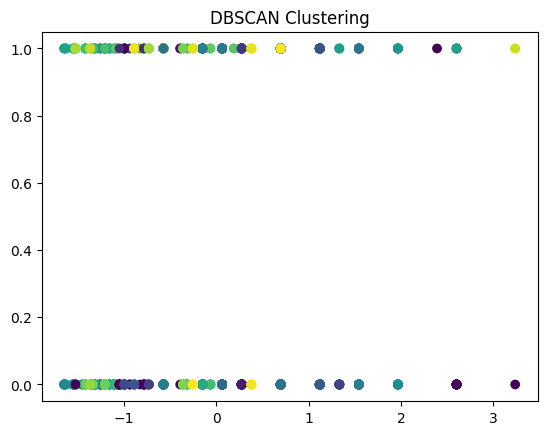

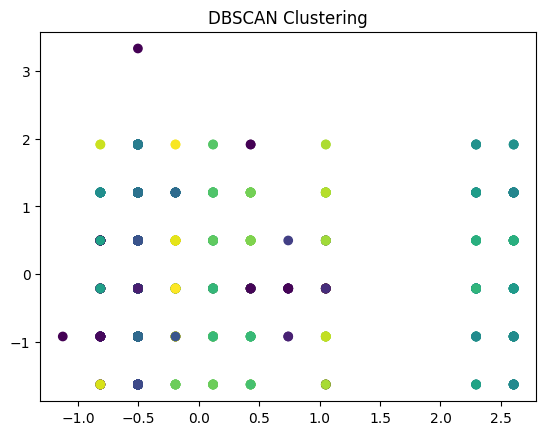

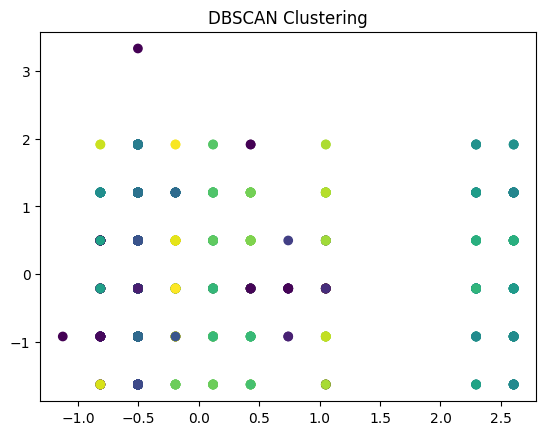

In [320]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(df3)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df3, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(df3[:, 5], df3[:, 2], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

plt.scatter(df3[:, 3], df3[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

plt.scatter(df3[:, 4], df3[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

DBSCAN Silhouette Score: 0.8892869203630865


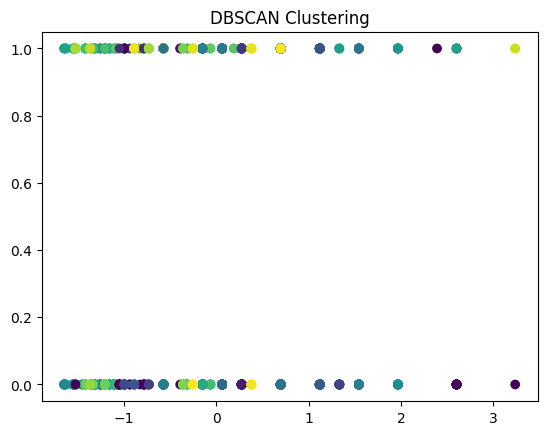

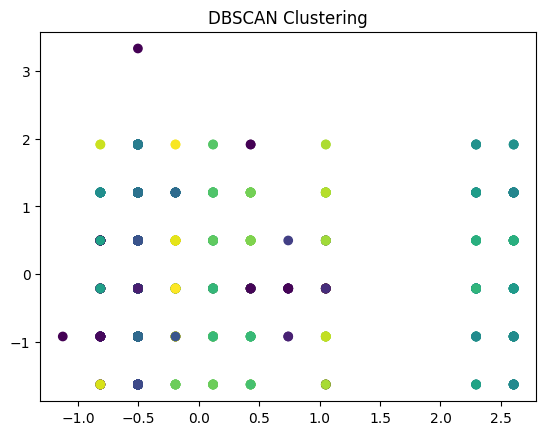

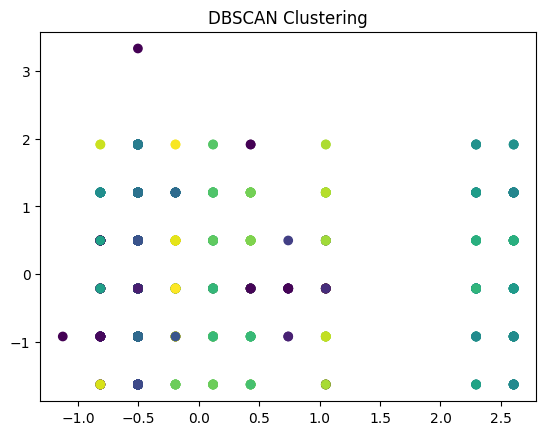

In [330]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(df2)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(df2, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(df2.iloc[:, 5], df2.iloc[:, 2], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

plt.scatter(df2.iloc[:, 3], df2.iloc[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

plt.scatter(df2.iloc[:, 4], df2.iloc[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

In [331]:
agglomerative_clustering = AgglomerativeClustering()
a_clustering_labels = agglomerative_clustering.fit_predict(df3)

# Silhouette Score
a_c_sil_score = silhouette_score(df3, a_clustering_labels)
print(f"Agglomerative Clustering Silhouette Score: {a_c_sil_score}")

Agglomerative Clustering Silhouette Score: 0.3517636347071262


Mean-Shift Silhouette Score: 0.4111337142350304


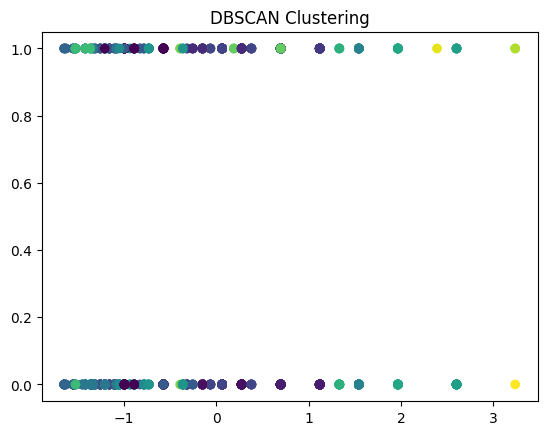

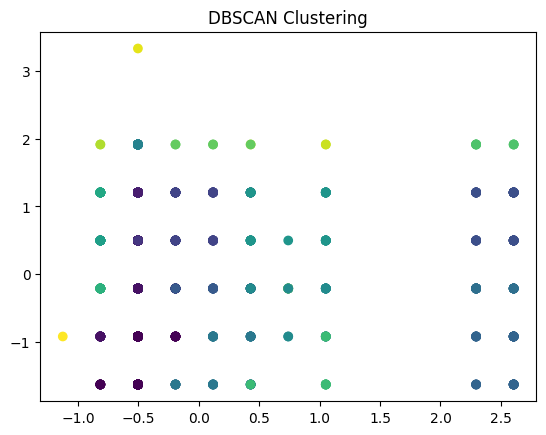

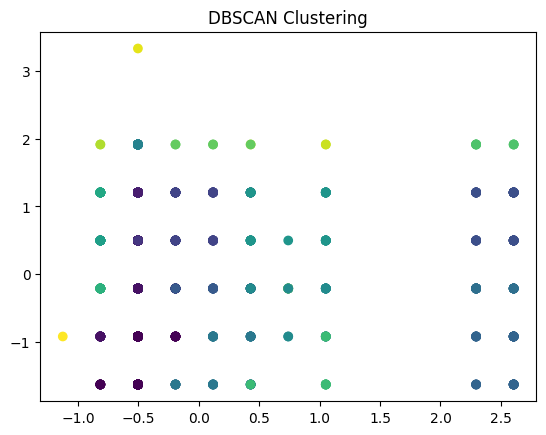

In [336]:
mean_shift_clustering = MeanShift(bandwidth=1)
clustering_labels = mean_shift_clustering.fit_predict(df3)

# Silhouette Score
ms_sil_score = silhouette_score(df3, clustering_labels)
print(f"Mean-Shift Silhouette Score: {ms_sil_score}")

plt.scatter(df3[:, 5], df3[:, 2], c=clustering_labels)
plt.title('DBSCAN Clustering')
plt.show()

plt.scatter(df3[:, 3], df3[:, 1], c=clustering_labels)
plt.title('DBSCAN Clustering')
plt.show()

plt.scatter(df3[:, 4], df3[:, 1], c=clustering_labels)
plt.title('DBSCAN Clustering')
plt.show()